### Support Vector Machine (SVM)

#### Introduction  
Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It is particularly effective for high-dimensional spaces and works well when the number of dimensions exceeds the number of samples.

#### How SVM Works  
SVM finds the optimal **hyperplane** that best separates data points into different classes. The hyperplane is chosen to maximize the **margin**, which is the distance between the nearest points (support vectors) of each class.

#### Key Concepts  
1. **Hyperplane**: A decision boundary that separates different classes.  
2. **Support Vectors**: Data points closest to the hyperplane that influence its position.  
3. **Margin**: The distance between the hyperplane and the nearest support vectors. SVM aims to maximize this margin for better generalization.  

### Types of SVM  
### 1. **Linear SVM**  
   - Used when data is **linearly separable**.
   - Finds the straight-line (or hyperplane in higher dimensions) that separates classes.  
   
   **Equation of the hyperplane:**  
   \[
   w \cdot x + b = 0
   \]
   where:
   - \( w \) is the weight vector,
   - \( x \) is the feature vector,
   - \( b \) is the bias term.

### 2. **Non-Linear SVM (Using Kernels)**  
   - Used when data is **not linearly separable**.
   - Maps data into a higher-dimensional space where it becomes linearly separable.
   - Uses kernel functions such as:
     - **Polynomial Kernel**: \( (x \cdot x')^d \)
     - **Radial Basis Function (RBF) Kernel**: \( e^{-\gamma ||x - x'||^2} \)
     - **Sigmoid Kernel**: \( \tanh(\alpha x \cdot x' + c) \)

### Hyperparameters of SVM  
1. **C (Regularization Parameter)**  
   - Controls the trade-off between achieving a low error and maximizing the margin.
   - A **high C** results in a smaller margin but fewer misclassifications.
   - A **low C** results in a larger margin but more misclassifications.

2. **Gamma (for RBF Kernel)**  
   - Defines how much influence a single training example has.
   - **High gamma** → Closer decision boundary, risk of overfitting.
   - **Low gamma** → Smoother decision boundary, risk of underfitting.

## Advantages of SVM  
- Effective in high-dimensional spaces.  
- Works well for both linear and non-linear data (using kernels).  
- Robust to overfitting in high-dimensional datasets.  
- Memory efficient, as it uses a subset of training points (support vectors).  

## Disadvantages of SVM  
- Can be slow on large datasets.  
- Sensitive to the choice of kernel and hyperparameters.  
- Not ideal when the dataset has significant overlapping classes.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [7]:
# Set a random seed for reproducibility
np.random.seed(0)

# Generate two clusters of data points in 2D space
# First cluster: 20 points normally distributed around (-2, -2)
# Second cluster: 20 points normally distributed around (2, 2)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],  # Shift the first set to the left-bottom
    np.random.randn(20, 2) + [2, 2]   # Shift the second set to the right-top
]

# Create corresponding labels
# First 20 points belong to class 0
# Last 20 points belong to class 1
y = [0] * 20 + [1] * 20

# The dataset now consists of 40 samples, where:
# - 'X' contains the feature values (2D coordinates)
# - 'y' contains the class labels (0 or 1)

In [4]:
X

array([[-0.23594765, -1.59984279],
       [-1.02126202,  0.2408932 ],
       [-0.13244201, -2.97727788],
       [-1.04991158, -2.15135721],
       [-2.10321885, -1.5894015 ],
       [-1.85595643, -0.54572649],
       [-1.23896227, -1.87832498],
       [-1.55613677, -1.66632567],
       [-0.50592093, -2.20515826],
       [-1.6869323 , -2.85409574],
       [-4.55298982, -1.3463814 ],
       [-1.1355638 , -2.74216502],
       [ 0.26975462, -3.45436567],
       [-1.95424148, -2.18718385],
       [-0.46722079, -0.53064123],
       [-1.84505257, -1.62183748],
       [-2.88778575, -3.98079647],
       [-2.34791215, -1.84365103],
       [-0.76970932, -0.79762015],
       [-2.38732682, -2.30230275],
       [ 0.95144703,  0.57998206],
       [ 0.29372981,  3.9507754 ],
       [ 1.49034782,  1.5619257 ],
       [ 0.74720464,  2.77749036],
       [ 0.38610215,  1.78725972],
       [ 1.10453344,  2.3869025 ],
       [ 1.48919486,  0.81936782],
       [ 1.97181777,  2.42833187],
       [ 2.06651722,

In [6]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

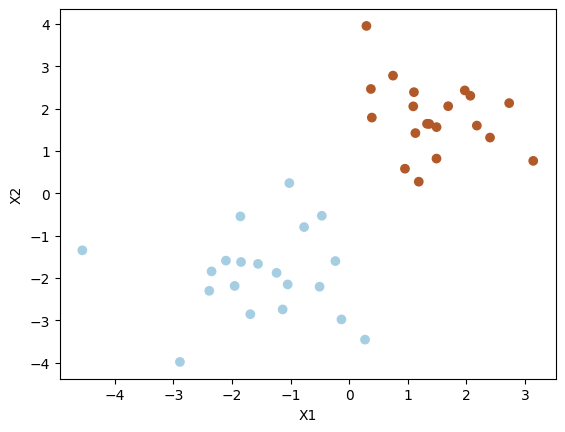

In [8]:
# visualize the dataset
plt.scatter(X[:,0],X[:, 1], c=y,cmap= plt.cm.Paired )
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
# train the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

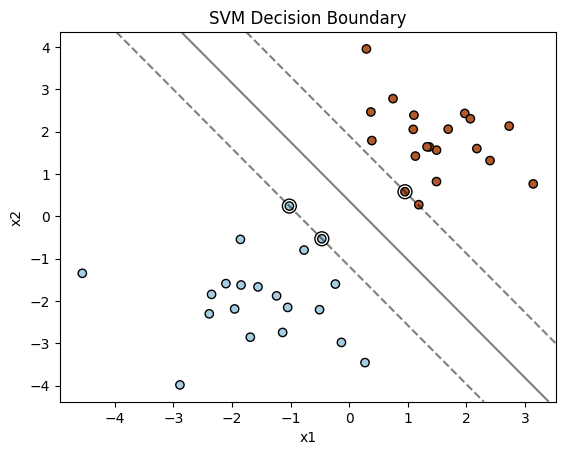

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic dataset
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

# Train SVM classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# Get current axis
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid for evaluating the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx, yy)  # Ensure the grid covers both axes
xy = np.c_[XX.ravel(), YY.ravel()]  # Combine the grid into (N,2) shape
z = clf.decision_function(xy).reshape(XX.shape)  # Reshape to match XX

# Plot decision boundary and margins
ax.contour(XX, YY, z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Labels and display
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("SVM Decision Boundary")
plt.show()


In [13]:
# Make predictions
np.random.seed(1)
X_test = np.random.randn(10,2)
y_pred = clf.predict(X_test)

print(f"Predictions: {y_pred}")

Predictions: [1 0 0 1 0 0 0 1 0 1]
